In [1]:
import sys
sys.path.append(r'C:\Users\festa\OneDrive\Desktop\Thesis\Thesis')
from functions import load_and_process_data, apply_bias_mitigation, evaluate_fairness_metrics, standardize_features, train_classifier_and_find_best_threshold, apply_best_threshold_and_compute_metrics, plot_metrics_dir, plot_metrics_aod, train_classifier_on_transformed_data, extract_fairness_metrics
from functions import train_classifier_with_dir, apply_DIR
import numpy as np

pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [2]:
train, val, test, privileged_groups, unprivileged_groups = load_and_process_data('meps', use_disparate_impact_remover=True)

In [3]:
train_transf, test_transf = apply_bias_mitigation('disparateimpactremover', train, test, unprivileged_groups, privileged_groups, 'RACE')


In [4]:
train_before_stat_parity_diff, train_before_disp_impact = evaluate_fairness_metrics(train, unprivileged_groups, privileged_groups, "Train Dataset (Before Transformation)")
test_before_stat_parity_diff, test_before_disp_impact = evaluate_fairness_metrics(test, unprivileged_groups, privileged_groups, "Test Dataset (Before Transformation)")

train_after_stat_parity_diff, train_after_disp_impact = evaluate_fairness_metrics(train_transf, unprivileged_groups, privileged_groups, "Train Dataset (After Transformation)")
test_after_stat_parity_diff, test_after_disp_impact = evaluate_fairness_metrics(test_transf, unprivileged_groups, privileged_groups, "Test Dataset (After Transformation)")

print("Train Dataset (Before Transformation) - Statistical Parity Difference:", train_before_stat_parity_diff)
print("Train Dataset (Before Transformation) - Disparate Impact:", train_before_disp_impact)
print("Test Dataset (Before Transformation) - Statistical Parity Difference:", test_before_stat_parity_diff)
print("Test Dataset (Before Transformation) - Disparate Impact:", test_before_disp_impact)

print("Train Dataset (After Transformation) - Statistical Parity Difference:", train_after_stat_parity_diff)
print("Train Dataset (After Transformation) - Disparate Impact:", train_after_disp_impact)
print("Test Dataset (After Transformation) - Statistical Parity Difference:", test_after_stat_parity_diff)
print("Test Dataset (After Transformation) - Disparate Impact:", test_after_disp_impact)


Train Dataset (Before Transformation) - Statistical Parity Difference: -0.1264
Train Dataset (Before Transformation) - Disparate Impact: 0.5029
Test Dataset (Before Transformation) - Statistical Parity Difference: -0.1491
Test Dataset (Before Transformation) - Disparate Impact: 0.4347
Train Dataset (After Transformation) - Statistical Parity Difference: -0.1264
Train Dataset (After Transformation) - Disparate Impact: 0.5029
Test Dataset (After Transformation) - Statistical Parity Difference: -0.1491
Test Dataset (After Transformation) - Disparate Impact: 0.4347


In [5]:
# Standardize the features (scaling)
train, val, test = standardize_features(train, val, test)

# Choose classifier type
classifier_type = 'random_forest'  # Change to 'random_forest' or 'xgboost'

# Train classifier
classifier, best_threshold, best_balanced_acc = train_classifier_and_find_best_threshold(train, val, classifier_type, unprivileged_groups, privileged_groups)


Best Threshold: 0.13
Best Balanced Accuracy: 0.6881205114642036


In [6]:
test_metrics, test_scores = apply_best_threshold_and_compute_metrics(classifier, test, best_threshold, unprivileged_groups, privileged_groups)

Balanced Accuracy (test): 0.712246835443038
Statistical Parity Difference (test): -0.2530605122812519
Disparate Impact (test): 0.4658303964900667
Average Odds Difference (test): -0.1944136538442628
Equal Opportunity Difference (test): -0.19031634625165295
Theil Index (test): 0.10828561568851565


In [7]:
%matplotlib inline

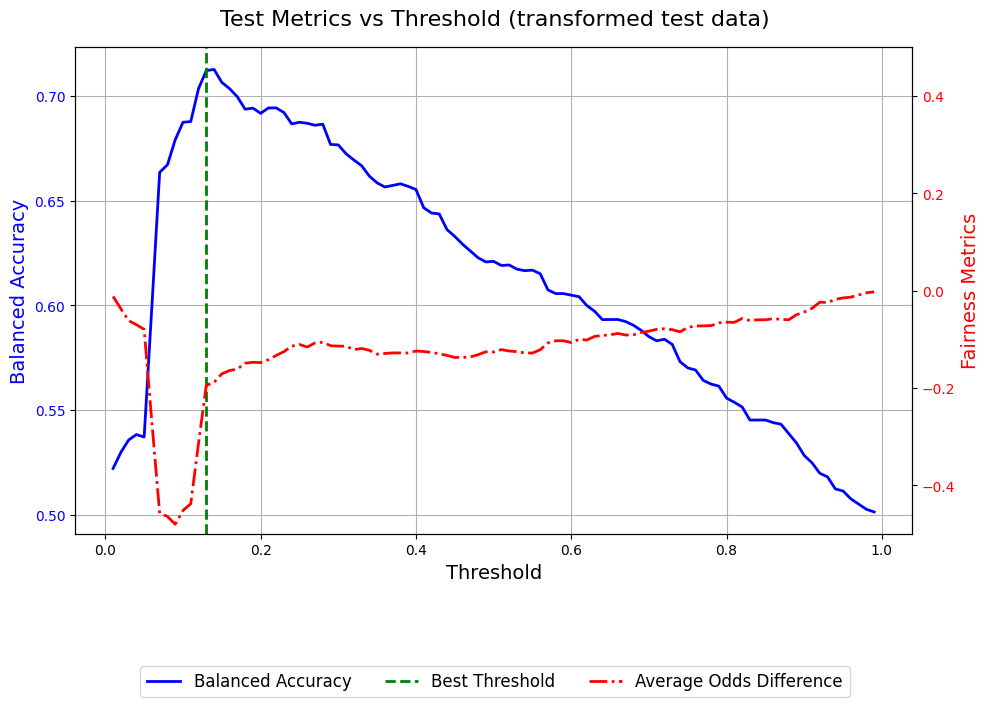

In [8]:
plot_metrics_aod(test, test_scores, best_threshold, unprivileged_groups, privileged_groups)


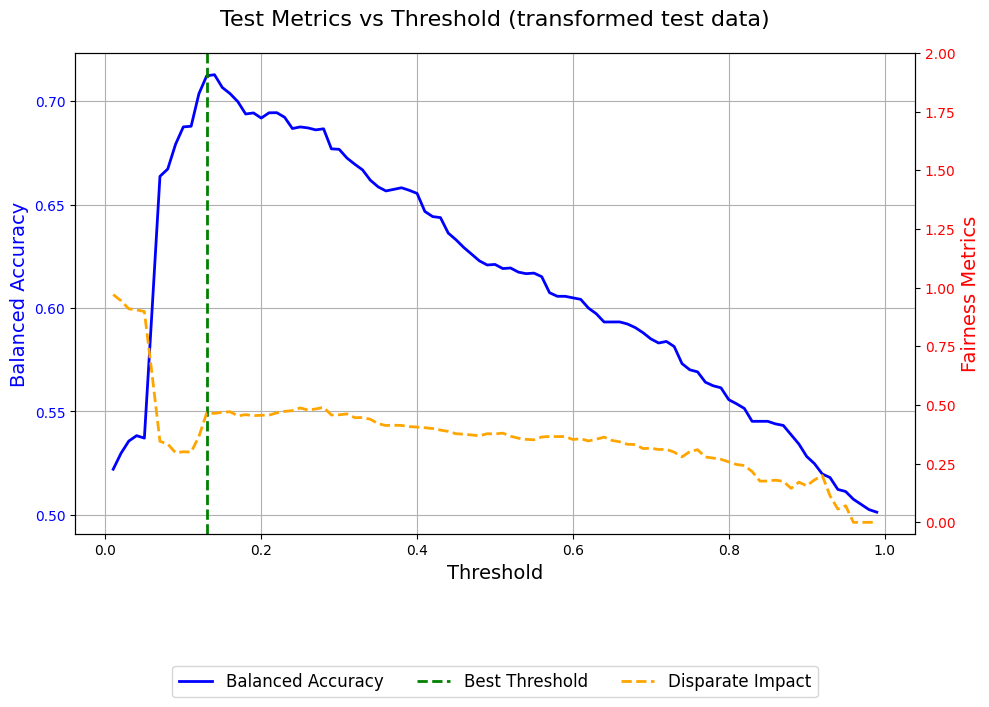

In [9]:
plot_metrics_dir(test, test_scores, best_threshold, unprivileged_groups, privileged_groups)

In [10]:
# Train classifier on transformed data and use the same threshold
classifier_type = 'random_forest'  # Change to 'random_forest' or 'xgboost'

test_transf_metrics_df = train_classifier_with_dir(
    train, test, classifier_type, best_threshold, unprivileged_groups, privileged_groups, "RACE", repair_levels=np.linspace(0., 1., 11))


=== Repair Level: 0.0 ===

=== Repair Level: 0.1 ===

=== Repair Level: 0.2 ===

=== Repair Level: 0.30000000000000004 ===

=== Repair Level: 0.4 ===

=== Repair Level: 0.5 ===

=== Repair Level: 0.6000000000000001 ===

=== Repair Level: 0.7000000000000001 ===

=== Repair Level: 0.8 ===

=== Repair Level: 0.9 ===

=== Repair Level: 1.0 ===

Results for Various Repair Levels:
    Repair Level  Balanced Accuracy  Statistical Parity Difference  \
0            0.0           0.688402                      -0.095812   
1            0.1           0.687864                      -0.095717   
2            0.2           0.633465                      -0.035306   
3            0.3           0.640491                      -0.023336   
4            0.4           0.692627                      -0.248706   
5            0.5           0.695222                      -0.254673   
6            0.6           0.705000                      -0.276731   
7            0.7           0.698275                      -0.2

In [11]:
chosen_repair_level = 0.3
test_transf_classifier, test_transf_scores, test_transf_metrics = apply_DIR(train, test, chosen_repair_level, classifier_type, best_threshold, unprivileged_groups, privileged_groups, "RACE")




=== Repair Level: 0.3 ===

Results for Various Repair Levels:
   Repair Level  Balanced Accuracy  Statistical Parity Difference  \
0           0.3           0.633608                       -0.04846   

   Disparate Impact  Average Odds Difference  Equal Opportunity Difference  \
0           0.91627                -0.021107                     -0.040484   

   Theil Index  
0     0.098579  


In [12]:
%matplotlib inline

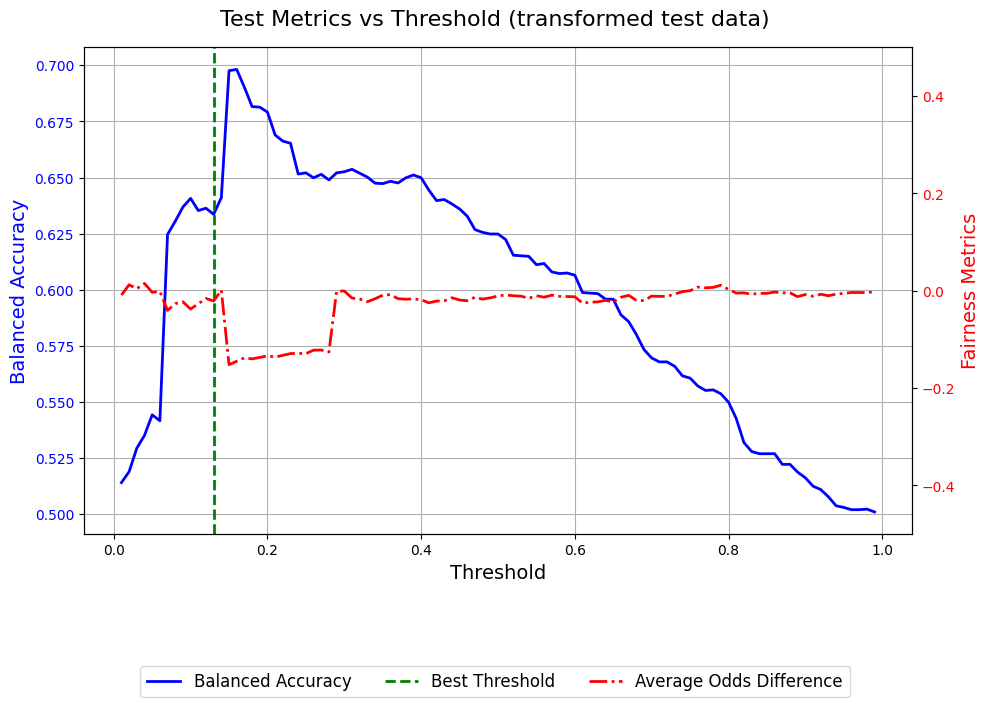

In [13]:
plot_metrics_aod(test_transf, test_transf_scores, best_threshold, unprivileged_groups, privileged_groups)

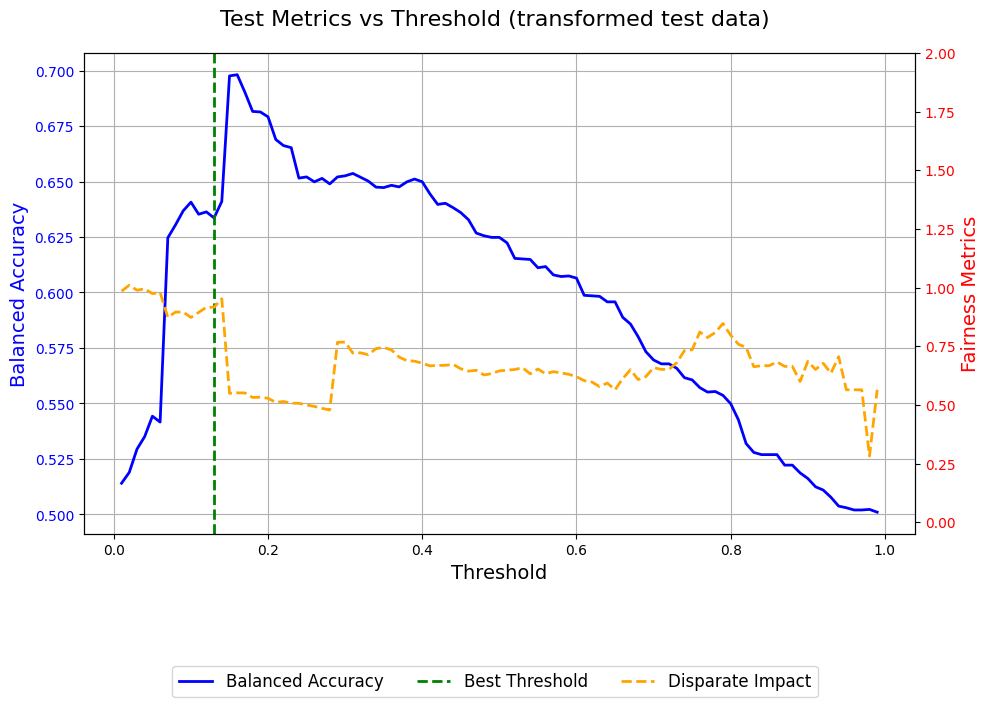

In [14]:
plot_metrics_dir(test_transf, test_transf_scores, best_threshold, unprivileged_groups, privileged_groups)

In [15]:
fairness_metrics, validation_metrics, test_metrics = extract_fairness_metrics(
    train_before_stat_parity_diff, train_after_stat_parity_diff,
    test_before_stat_parity_diff, test_after_stat_parity_diff,
    train_before_disp_impact, train_after_disp_impact,
    test_before_disp_impact, test_after_disp_impact,
    best_threshold, best_balanced_acc,
    test_metrics, test_transf_metrics
)

# Displaying the tables
for table in [fairness_metrics, validation_metrics, test_metrics]:
    display(table.name)
    display(table)


'Fairness Metrics Before and After Transformation'

,Dataset,Stage,Metric,Value
0,Train,Before Transformation,Statistical Parity Difference,-0.1264
1,Train,After Transformation,Statistical Parity Difference,-0.1264
2,Test,Before Transformation,Statistical Parity Difference,-0.1491
3,Test,After Transformation,Statistical Parity Difference,-0.1491
4,Train,Before Transformation,Disparate Impact,0.5029
5,Train,After Transformation,Disparate Impact,0.5029
6,Test,Before Transformation,Disparate Impact,0.4347
7,Test,After Transformation,Disparate Impact,0.4347


'Validation Metrics for Threshold Selection'

,Dataset,Stage,Metric,Value
0,Validation,Best Threshold (Validation),Threshold,0.130000
1,Validation,Best Threshold (Validation),Balanced Accuracy,0.688121


'Test Metrics After Applying Threshold On Original and Transformed'

,Dataset,Stage,Metric,Value
0,Test (Original),After Threshold,Balanced Accuracy,0.712247
1,Test (Transformed),After Threshold,Balanced Accuracy,0.633608
2,Test (Original),After Threshold,Statistical Parity Difference,-0.253061
3,Test (Transformed),After Threshold,Statistical Parity Difference,-0.048460
4,Test (Original),After Threshold,Disparate Impact,0.465830
5,Test (Transformed),After Threshold,Disparate Impact,0.916270
6,Test (Original),After Threshold,Average Odds Difference,-0.194414
7,Test (Transformed),After Threshold,Average Odds Difference,-0.021107
8,Test (Original),After Threshold,Equal Opportunity Difference,-0.190316
9,Test (Transformed),After Threshold,Equal Opportunity Difference,-0.040484
